## V5589 Sgr Spectral Index

In [2]:
#imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

### Importing the data and putting it in a large dataframe

In [3]:
data = ([56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],
    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],
    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],
    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],
    
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],

#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],

#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05

    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],
       )

df =  pd.DataFrame(data, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

In [4]:
df['error']

0      0.025
1      2.000
2      0.028
3      0.025
4      0.042
       ...  
101    0.024
102    0.031
103    0.053
104    0.011
105    0.110
Name: error, Length: 106, dtype: float64

### now to seperate it into dataframe based on days

In [5]:
E1=(    [56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],)

E2=(    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],)

E3=(    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],)

E4=(    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],)

E5=(
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],)

E6 =(
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],)

E7 =(
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],)

E8 =(
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],)

E9 = (
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],)

E10=(
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],)

E11 = (
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],
#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],
#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05
)

E12 = (
    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],)

E13= (
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],)

E14 = (
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],)

E15 = (
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],)

E16 = (
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],)

E17 = (
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],)

E18 = (
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],)

E19 = (
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],)

E20 = (
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],)

E21 = (
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],)

E22 = (
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],)

E23 = (
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],)

E24 = (
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],)

### Creating the dataframes

In [6]:
df1 =  pd.DataFrame(E1, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df2 =  pd.DataFrame(E2, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df3 =  pd.DataFrame(E3, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df4 =  pd.DataFrame(E4, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df5 =  pd.DataFrame(E5, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df6 =  pd.DataFrame(E6, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df7 =  pd.DataFrame(E7, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df8 =  pd.DataFrame(E8, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df9 =  pd.DataFrame(E9, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df10 =  pd.DataFrame(E10, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df11 =  pd.DataFrame(E11, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df12 =  pd.DataFrame(E12, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df13 =  pd.DataFrame(E13, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df14 =  pd.DataFrame(E14, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df15 =  pd.DataFrame(E15, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df16 =  pd.DataFrame(E16, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df17 =  pd.DataFrame(E17, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df18 =  pd.DataFrame(E18, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df19 =  pd.DataFrame(E19, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df20 =  pd.DataFrame(E20, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df21 =  pd.DataFrame(E21, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df22 =  pd.DataFrame(E22, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df23 =  pd.DataFrame(E23, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df24 =  pd.DataFrame(E24, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])


In [7]:
df2['error']

0    2.0
Name: error, dtype: float64

In [8]:
#Error on alpha for only two data points
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

### Now plotting the alpha lines using power laws

In [9]:
def onedlineneg(x_data, y_data, y_err):

    #LevMarLSQFitter calc uncertainties=True to get covariance matrix and find error on slope
    #Inputting the first point in the x and y data and an estimate on alpha
    PL =  PowerLaw1D(amplitude = y_data[0], x_0= x_data[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x_data), max(x_data)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

    fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
    fit_model = fit(PL, x_data, y_data)

    #weight is 1/error^2
    y_weight = 1/ (np.power(y_err,2))  

    # fit the data using the uncertainties as weights
    fit_model_weights = fit(PL, x_data, y_data, weights=y_weight)

    return fit_model_weights



#### Day 46.4

In [10]:
#Since this day has only two data points, I have to make x_0 fixed in order to run the powerlaw1d. 
#this is done in the code below so I can use the function for the rest of the points

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():
    x3 = df3['Freq'][mask].values.tolist()
    y3 = df3['Flux'][mask].values.tolist()
    yerr3 = df3['error'][mask].values.tolist()

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model3 = fit(PL3, x3, y3)

    #weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3,2))  

    # fit the data using the uncertainties as weights
fit_model_weights3 = fit(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=1.089, x_0=5., alpha=-0.77255236)>

In [11]:
#Same slope as PL3 
alpha_err3 = two_points(y3,x3,yerr3)
print(alpha_err3)

(0.772552360072047, 0.10226596359570364)


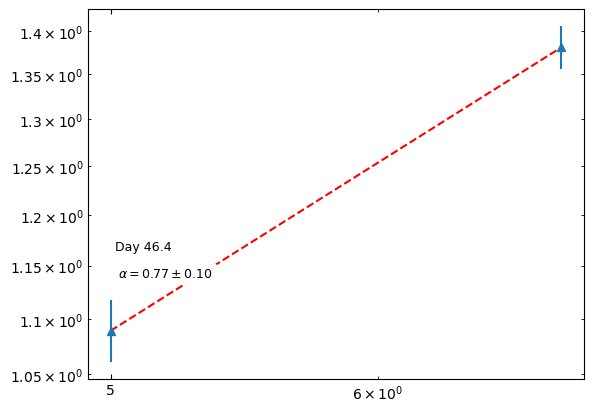

In [12]:
fig,ax = plt.subplots()
mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 46.4', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq'][mask], fit_model_weights3(df3['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.77 \\pm 0.10}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 54.2

In [13]:
mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():
    x4 = df4['Freq'][mask].values.tolist()
    y4 = df4['Flux'][mask].values.tolist()
    yerr4 = df4['error'][mask].values.tolist()

onedlineneg(x4, y4, yerr4)

<PowerLaw1D(amplitude=3.84737053, x_0=15.28140064, alpha=-0.60591969)>

In [14]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x4), max(x4)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)

    #weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4,2))  

    # fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)
fit_model_weights4

<PowerLaw1D(amplitude=3.84737053, x_0=15.28140064, alpha=-0.60591969)>

In [15]:
fit4.fit_info

{'nfev': 15,
 'fvec': array([  7.86732905,  -9.9959823 , -15.6317535 ,  28.95761926]),
 'fjac': array([[-6.96753340e+02, -4.76683117e+01,  1.06290628e+02,
          1.25894736e-01],
        [-4.76683117e+01,  5.42132702e+02, -5.09190365e-13,
          5.85327661e-01],
        [ 1.06290628e+02,  4.99053342e-15, -1.33057494e-14,
          6.25143769e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([-9.79660797e-13, -6.65234570e-08, -1.36305383e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.31447747e+26,  8.61662579e+26, -7.93192494e+09],
        [ 8.61662579e+26,  5.64834634e+27, -5.19951316e+10],
        [-7.93192494e+09, -5.19951316e+10,  3.88106134e-06]]),
 'njev': 8,
 'cov_x': array([[ 1.31447747e+26,  8.61662579e+26, -7.93192494e+09],
        [ 8.61662579e+26,  5.64834634e+27, -5.19951316e+10],
        [-7.93192494e+09, -5.19951316e+10,  3.88106134

In [17]:
var4 = np.var(np.array([  7.86732905,  -9.9959823 , -15.6317535 ,  28.95761926]))
var4

303.3413918040618

In [18]:
param_cov4_1 =  np.array([[ 1.31447747e+26,  8.61662579e+26, -7.93192494e+09],
        [ 8.61662579e+26,  5.64834634e+27, -5.19951316e+10],
        [-7.93192494e+09, -5.19951316e+10,  3.88106134e-06]])

diag4_1 = np.diagonal(param_cov4_1*var4)[2]
stand_dev4_1 = np.sqrt(diag4_1)
print(stand_dev4_1)

0.03431160953019454


In [40]:
param_cov4 = np.array([[5.37617877e+29, 3.60384484e+30, 9.67558500e+12],
                       [3.60384484e+30, 2.41578604e+31, 6.48589054e+13],
                       [9.67558500e+12, 6.48589054e+13, 4.40916338e-03]])


diag4 = np.diagonal(param_cov4)[2]
stand_dev4 = np.sqrt(diag4)
print(stand_dev4)
print('The slope is -0.606 +/- 0.066' )

0.06640153145824274
The slope is -0.606 +/- 0.066


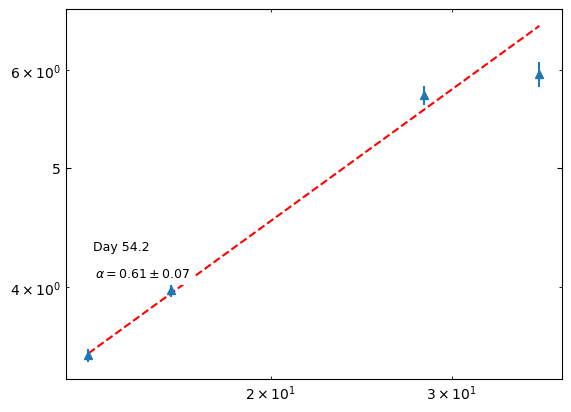

In [41]:

fig,ax = plt.subplots()
mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 54.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq'][mask], fit_model_weights4(df4['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.61 \\pm 0.07}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


#### Day 62.3

In [42]:
mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():
    x5 = df5['Freq'][mask].values.tolist()
    y5 = df5['Flux'][mask].values.tolist()
    yerr5 = df5['error'][mask].values.tolist()

onedlineneg(x5, y5, yerr5)

<PowerLaw1D(amplitude=3.62427625, x_0=6.94575726, alpha=-0.16890168)>

In [43]:
PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x5), max(x5)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)

    #weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5,2))  

    # fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)


In [44]:
fit5.fit_info

{'nfev': 19,
 'fvec': array([-32.31293841,  30.11495686,  10.49387062, -28.29306318,
         24.78637314,  32.06449405]),
 'fjac': array([[-4.00084309e+03, -1.91117739e+03,  1.68436674e+02,
          3.06296377e-02, -6.99983150e-02, -9.68113808e-02],
        [-1.91117739e+03, -1.90715085e+03,  1.68081806e+02,
          8.10092779e-01,  2.59728688e-01,  1.94815673e-01],
        [ 1.68436674e+02,  1.68081806e+02,  3.48093429e-14,
         -0.00000000e+00, -4.08248290e-01, -4.08248290e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-2.80022835e-04, -2.79432944e-04,  1.33942862e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.41031940e+24,  7.27350949e+25, -1.84861062e+09],
        [ 7.27350949e+25,  8.25293360e+26, -2.09753774e+10],
        [-1.84861062e+09, -2.09753774e+10,  6.58314513e-07]]),
 'njev': 10,
 'cov_x': array([[ 6.41031940e+24,  7.27350949

In [19]:
fvec =  np.array([-32.31293841,  30.11495686,  10.49387062, -28.29306318,
         24.78637314,  32.06449405])
var5 = np.var(fvec)
var5

712.9642749850351

In [20]:
param_cov = np.array([[ 6.41031940e+24,  7.27350949e+25, -1.84861062e+09],
        [ 7.27350949e+25,  8.25293360e+26, -2.09753774e+10],
        [-1.84861062e+09, -2.09753774e+10,  6.58314513e-07]])

diag = np.diagonal(param_cov*var5)[2]
stand_dev = np.sqrt(diag)
print(stand_dev)

0.021664596222250983


In [40]:
param_cov5 = np.array([[2.23557274e+28, 9.05956936e+28, 1.25726781e+12],
                        [9.05956936e+28, 3.67135434e+29, 5.09502766e+12],
                        [1.25726781e+12, 5.09502766e+12, 2.47587837e-04]])

diag5 = np.diagonal(param_cov5)[2]
stand_dev5 = np.sqrt(diag5)


print(stand_dev5)
print('The slope is -0.1689 +/- 0.0157' )

0.015734924118024844
The slope is -0.1689 +/- 0.0157


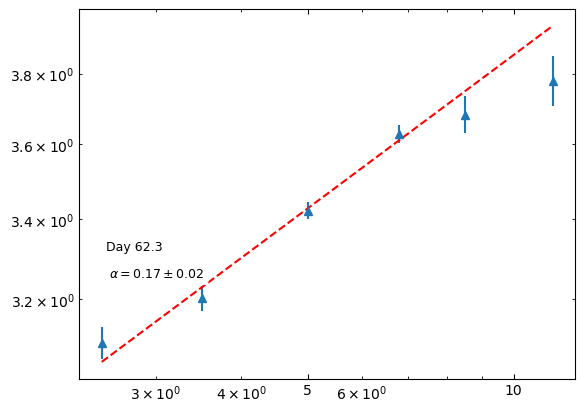

In [159]:

fig,ax = plt.subplots()
mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 62.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq'][mask], fit_model_weights5(df5['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.17 \\pm 0.02}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 81.1

In [112]:
mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():
    x7 = df7['Freq'][mask].values.tolist()
    y7 = df7['Flux'][mask].values.tolist()
    yerr7 = df7['error'][mask].values.tolist()

onedlineneg(x7, y7, yerr7)

<PowerLaw1D(amplitude=0., x_0=1.35, alpha=-1.19858349)>

In [113]:
PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= -1.0,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x7), max(x7)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

fit_model7 = fit7(PL7, x7, y7)

y_weight7 = 1/ (np.power(yerr7,2))  

fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)
fit_model_weights7

<PowerLaw1D(amplitude=1.92964427, x_0=7.47310505, alpha=-0.06152324)>

In [116]:
#fit7.fit_info
param_cov7 = np.array([[ 3.30093214e+29,  2.07788371e+31, -4.25768177e+13],
                        [ 2.07788371e+31,  1.30799438e+33, -2.68014221e+15],
                        [-4.25768177e+13, -2.68014221e+15,  1.31336395e-02]])

diag7 = np.diagonal(param_cov7)[2]

stand_dev7 = np.sqrt(diag7)

print(stand_dev7)
print('The slope is 0.06 +/- 0.11')

0.11460209204024158
The slope is 0.06 +/- 0.11


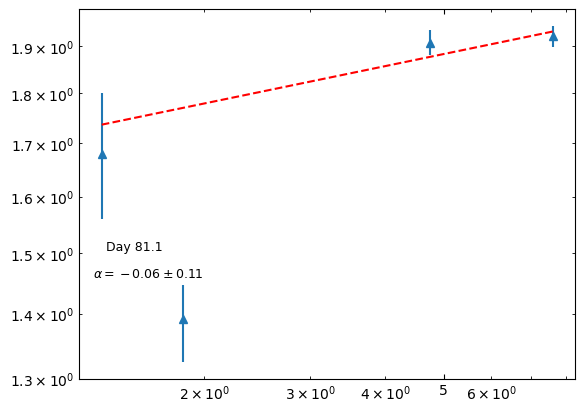

In [118]:
fig,ax = plt.subplots()
mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 81.1', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq'][mask], fit_model_weights7(df7['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.06 \\pm 0.11}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 90.3

In [119]:
mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():
    x8 = df8['Freq'][mask].values.tolist()
    y8 = df8['Flux'][mask].values.tolist()
    yerr8 = df8['error'][mask].values.tolist()

onedlineneg(x8, y8, yerr8)

<PowerLaw1D(amplitude=1.36855667, x_0=20.40492784, alpha=0.05228461)>

In [152]:
PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= 0.03,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x8), max(x8)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)

    #weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8,2))  

    # fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8

<PowerLaw1D(amplitude=1.37958689, x_0=17.5, alpha=0.05228276)>

In [154]:
#Find the slope and error 

p, V = np.polyfit(np.log(x8),np.log(y8), 1, w = y_weight8, cov=True)

print("Slope: {} +/- {}".format(p[0], np.sqrt(V[0][0]))) #slope and error 
print("Intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1]))) #intercept and error

Slope: -0.06508755976409032 +/- 0.19433432497259354
Intercept: 0.5084722832905935 +/- 0.5751575665207337


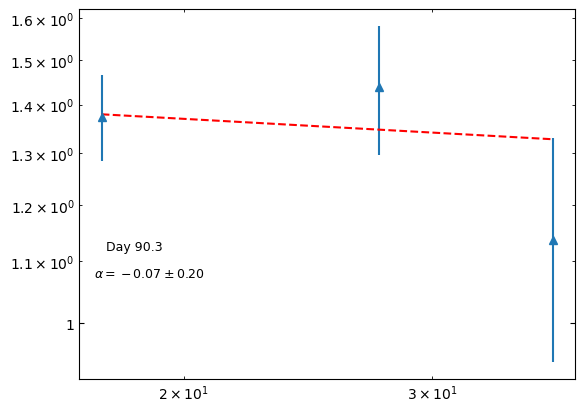

In [155]:

fig,ax = plt.subplots()
mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 90.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq'][mask], fit_model_weights8(df8['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.07 \\pm 0.20}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 110

In [129]:
mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():
    x9 = df9['Freq'][mask].values.tolist()
    y9 = df9['Flux'][mask].values.tolist()
    yerr9 = df9['error'][mask].values.tolist()

onedlineneg(x9, y9, yerr9)   

<PowerLaw1D(amplitude=0., x_0=5.9555801, alpha=-0.93005771)>

In [137]:
PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= 0.01,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x9), max(x9)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)

    #weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9,2))  

    # fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9

<PowerLaw1D(amplitude=0.50868677, x_0=4.50914544, alpha=-0.10307773)>

In [139]:
#fit9.fit_info

In [133]:

param_cov9 = np.array([[6.06187671e+26, 1.06873192e+29, 8.12087362e+11],
        [1.06873192e+29, 1.88421503e+31, 1.43174091e+14],
        [8.12087362e+11, 1.43174091e+14, 5.54602037e-03]])

diag9 = np.diagonal(param_cov9)[2]
stand_dev9 = np.sqrt(diag9)

print(stand_dev9)
print('The slope is 0.10 +/- 0.07')

0.07447160781129947
The slope is 0.10 +/- 0.07


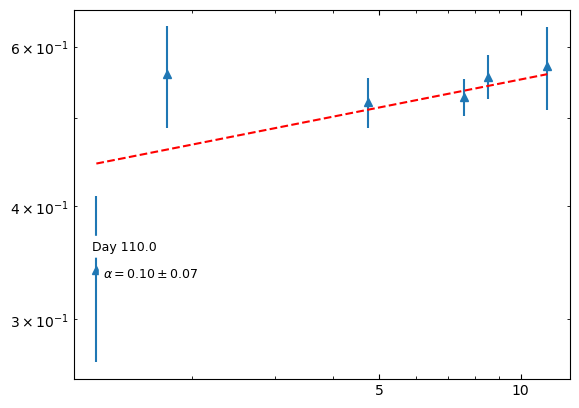

In [140]:
fig,ax = plt.subplots()
mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 110.0', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq'][mask],  fit_model_weights9(df9['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.10\\pm 0.07}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

#### Day 113.3

In [50]:
mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():
    x10 = df10['Freq'][mask].values.tolist()
    y10 = df10['Flux'][mask].values.tolist()
    yerr10 = df10['error'][mask].values.tolist()



In [51]:
onedlineneg(x10, y10, yerr10)

/Users/isabellamolina/opt/anaconda3/lib/python3.10/site-packages/astropy/modeling/powerlaws.py:58: RuntimeWarning: invalid value encountered in power
  d_amplitude = xx ** (-alpha)
/Users/isabellamolina/opt/anaconda3/lib/python3.10/site-packages/astropy/modeling/powerlaws.py:60: RuntimeWarning: invalid value encountered in log
  d_alpha = -amplitude * d_amplitude * np.log(xx)


<PowerLaw1D(amplitude=0.42705815, x_0=12.56859572, alpha=0.13931653)>

In [52]:
PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x10), max(x10)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)

    #weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10,2))  

    # fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10


<PowerLaw1D(amplitude=0.42705815, x_0=12.56859572, alpha=0.13931653)>

In [54]:
param_cov10 = np.array([[ 1.76357185e+27, -3.73151804e+29,  7.82017502e+11],
                        [-3.73151804e+29,  7.89546904e+31, -1.65466036e+14],
                        [ 7.82017502e+11, -1.65466036e+14,  3.79373174e-03]])


diag10 = np.diagonal(param_cov10)

stand_dev10 = np.sqrt(diag10[2])

print(stand_dev10)
print('The slope is -0.139 +/- 0.06159')

0.061593276743488815


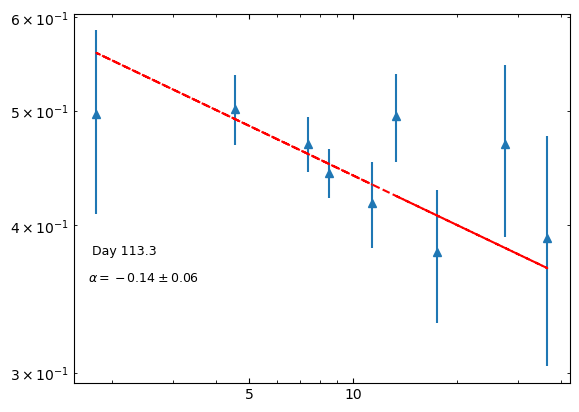

In [61]:
fig,ax = plt.subplots()
mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 113.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq'][mask], fit_model_weights10(df10['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.14 \\pm 0.06}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 129

In [62]:
mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():
    x11 = df11['Freq'][mask].values.tolist()
    y11 = df11['Flux'][mask].values.tolist()
    yerr11 = df11['error'][mask].values.tolist()


In [66]:
#print(onedlineneg(x11, y11, yerr11))

PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x11), max(x11)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)

    #weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11,2))  

    # fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11

<PowerLaw1D(amplitude=0.32288939, x_0=2.64086184, alpha=0.07719678)>

In [69]:
fit11.fit_info
param_cov11 = np.array([[ 3.78793096e+28, -4.01323644e+30,  2.40335011e+13],
                        [-4.01323644e+30,  4.25194306e+32, -2.54630097e+15],
                        [ 2.40335011e+13, -2.54630097e+15,  4.20947054e-02]])

diag = np.diagonal(param_cov11)[2]
stand_dev11 = np.sqrt(diag)

print(stand_dev11)
print('The slope is -0.077 +/- 0.205')

0.2051699427304107
The slope is -0.077 +/- 0.205


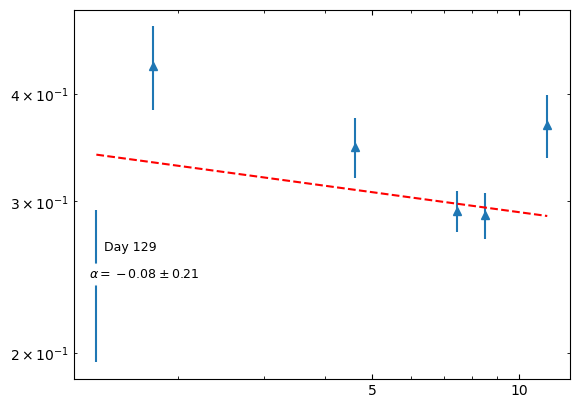

In [158]:
fig,ax = plt.subplots()
mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 129', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq'][mask], fit_model_weights11(df11['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.08 \\pm 0.21}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 136.2

In [72]:
mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():
    x12 = df12['Freq'][mask].values.tolist()
    y12 = df12['Flux'][mask].values.tolist()
    yerr12 = df12['error'][mask].values.tolist()


#print(onedlineneg(x12, y12, yerr12))

In [82]:
PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= 0.9,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x12), max(x12)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)

    #weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12,2))  

    # fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12

<PowerLaw1D(amplitude=0.16639861, x_0=14.85423994, alpha=0.96460975)>

In [156]:
#No Param Cov from fit12.fit_info

p, V = np.polyfit(np.log(x12),np.log(y12), 1, w = y_weight12, cov=True)

print("Slope: {} +/- {}".format(p[0], np.sqrt(V[0][0]))) #slope and error 
print("Intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1]))) #intercept and error

Slope: -0.851080849988526 +/- 0.3899130990078782
Intercept: 0.4995523236115625 +/- 1.0765184490190454


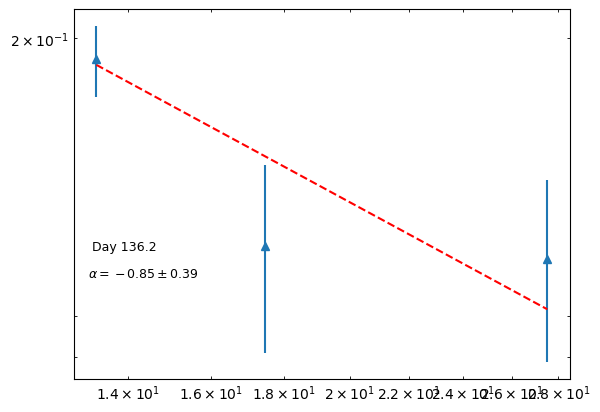

In [157]:

fig,ax = plt.subplots()
mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 136.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq'][mask], fit_model_weights12(df12['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.85 \\pm 0.39}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 139.9

In [91]:
#Since this day has only two data points, I have to make x_0 fixed in order to run the powerlaw1d. 
#this is done in the code below so I can use the function for the rest of the points

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():
    x13 = df13['Freq'][mask].values.tolist()
    y13 = df13['Flux'][mask].values.tolist()
    yerr13 = df13['error'][mask].values.tolist()


PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= 0.5,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit13 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model13 = fit13(PL13, x13, y13)

    #weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13,2))  

    # fit the data using the uncertainties as weights
fit_model_weights13 = fit13(PL13, x13, y13, weights=y_weight13)

fit_model_weights13


<PowerLaw1D(amplitude=0.225, x_0=1.33, alpha=0.394665)>

In [142]:
#Same alpha as above
two_points(y13, x13, yerr13)

(-0.3946649952020133, 1.0013596904884243)

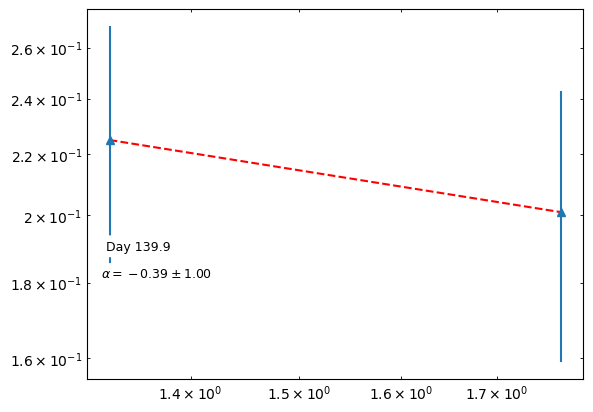

In [143]:
fig,ax = plt.subplots()
mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 139.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq'][mask], fit_model_weights13(df13['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.39 \\pm 1.00}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();